# Search and delete heavy files in the computer system
<hr>

## Import modules

In [7]:
import os, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from IPython.display import clear_output as co
sns.set()

#### Define folder for file size search

In [5]:
folder = '/users/luisr/Desktop/'

## Get files' size as pandas series

In [1]:
from file_manager import files_tree_sizes, remove_files

In [7]:
fs = files_tree_sizes(folder, report_level=5)

Scanning items: [[4, 4], [12, 12], [6, 6], [12, 12], [5, 5]]


#### Converting pandas series to pandas dataframe and saving

In [10]:
df = fs.to_frame('bytes')
df.index.name = 'file'
df.to_csv('Desktop Files.csv', index=True)

## Analyse result

#### Largest files

In [16]:
df.sort_values('bytes', ascending=False).head()

,bytes
file,
/users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3a.iso,8.272445e+09
/users/luisr/Desktop/Outros\Arquivos\Borderlands.2-SKIDROW\sr-borderlands2.iso,7.665924e+09
/users/luisr/Desktop/Outros\Arquivos\Far_Cry_2-Razor1911\rzr-fcr2.iso,3.946578e+09
/users/luisr/Desktop/Outros\Arquivos\Hitman Blood Money repack Mr DJ\DJ.bin,3.513614e+09
/users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3b.iso,2.081108e+09


#### Total folder size:

In [17]:
df.sum() / 1e9 # Gb

bytes    53.36587
dtype: float64

#### Number of files:

In [18]:
df.shape[0]

431316

#### Cumultive file size sum

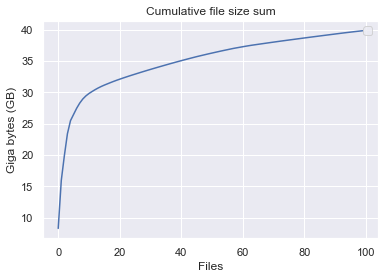

In [19]:
(df['bytes'].sort_values(ascending=False).head(100).reset_index(drop=True) / 1e9).cumsum().plot()
plt.title('Cumulative file size sum')
plt.ylabel('Giga bytes (GB)')
plt.xlabel('Files')
plt.legend([])
plt.show()

## Delete Files

#### Check large files

In [30]:
df.sort_values('bytes', ascending=False).head(5)

,bytes
file,
/users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3a.iso,8.272445e+09
/users/luisr/Desktop/Outros\Arquivos\Borderlands.2-SKIDROW\sr-borderlands2.iso,7.665924e+09
/users/luisr/Desktop/Outros\Arquivos\Far_Cry_2-Razor1911\rzr-fcr2.iso,3.946578e+09
/users/luisr/Desktop/Outros\Arquivos\Hitman Blood Money repack Mr DJ\DJ.bin,3.513614e+09
/users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3b.iso,2.081108e+09


#### select files to delete

In [21]:
ignore = [
    '/users/luisr/Desktop/Pessoal\facebook-account-data\facebook-luisresendesilva.zip',
    '/users/luisr/Desktop/Repositories\Dados\Desafio COR-Rio IV\Edificações_2013.csv',
    '/users/luisr/Desktop/Repositories\Data Science Projects\Bain - Strategic Chellenge 2022 (Revisited)\scores\scores.csv',
    '/users/luisr/Desktop/Repositories\Data Science Projects\Land Area & CO2 Emission in Pará, Brazil - Multivariate Time Series Forecasting\scores\full_scores.csv',
    
]

n_top_files = 51
heavy_files = [file for file in df.sort_values('bytes', ascending=False).head(n_top_files).index.tolist() if file not in ignore]

len(heavy_files)

49

#### Delete selected files

In [24]:
fail = remove_files(heavy_files)

files removed: 48/49


#### Check delete fails

In [27]:
for file in fail:
    print(os.path.exists(file), '-', file)

True - /users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3a.iso
True - /users/luisr/Desktop/Outros\Arquivos\Borderlands.2-SKIDROW\sr-borderlands2.iso
True - /users/luisr/Desktop/Outros\Arquivos\Far_Cry_2-Razor1911\rzr-fcr2.iso
True - /users/luisr/Desktop/Outros\Arquivos\Hitman Blood Money repack Mr DJ\DJ.bin
True - /users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3b.iso
True - /users/luisr/Desktop/Repositories\Data Science Projects\.git\objects\pack\pack-1fcd895cc035edb95b7ddf2c850380ab0c9751eb.pack
True - /users/luisr/Desktop/Outros\Arquivos\Hitman 2 Silent Assassin\setup.exe
True - /users/luisr/Desktop/Repositories\Data Science Projects\.git\objects\pack\tmp_pack_iZ8BzU
True - /users/luisr/Desktop/Repositories\Certificates\.git\objects\e5\5d840cbfb5efb0ef7785273023d902cdbd604c
True - /users/luisr/Desktop/Outros\Arquivos\Hitman 2 Silent Assassin [qoob RePack]\data1.bin


#### File size of failed exclusions

In [29]:
df.loc[fail]

,bytes
file,
/users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3a.iso,8.272445e+09
/users/luisr/Desktop/Outros\Arquivos\Borderlands.2-SKIDROW\sr-borderlands2.iso,7.665924e+09
/users/luisr/Desktop/Outros\Arquivos\Far_Cry_2-Razor1911\rzr-fcr2.iso,3.946578e+09
/users/luisr/Desktop/Outros\Arquivos\Hitman Blood Money repack Mr DJ\DJ.bin,3.513614e+09
/users/luisr/Desktop/Outros\Arquivos\Far.Cry.3-RELOADED\rld-fc3b.iso,2.081108e+09
/users/luisr/Desktop/Repositories\Data Science Projects\.git\objects\pack\pack-1fcd895cc035edb95b7ddf2c850380ab0c9751eb.pack,9.903786e+08
/users/luisr/Desktop/Outros\Arquivos\Hitman 2 Silent Assassin\setup.exe,3.854668e+08
/users/luisr/Desktop/Repositories\Data Science Projects\.git\objects\pack\tmp_pack_iZ8BzU,2.700083e+08
/users/luisr/Desktop/Repositories\Certificates\.git\objects\e5\5d840cbfb5efb0ef7785273023d902cdbd604c,2.411316e+08
